In [2]:
import math
import matplotlib.pyplot as plt
import pandas
import numpy as np

In [3]:
robot_a = pandas.read_csv('robot_A.csv')
robot_b = pandas.read_csv('robot_B.csv')

print("#0 Tiempo de inspección medio de cada robot\n")
print("Media robot A", sum(robot_a.to_numpy())/robot_a.size)
print("Media robot B", sum(robot_b.to_numpy())/robot_b.size)


#1 Tiempo de inspección medio de cada robot

Media robot A [9.78591518]
Media robot B [6.56668294]


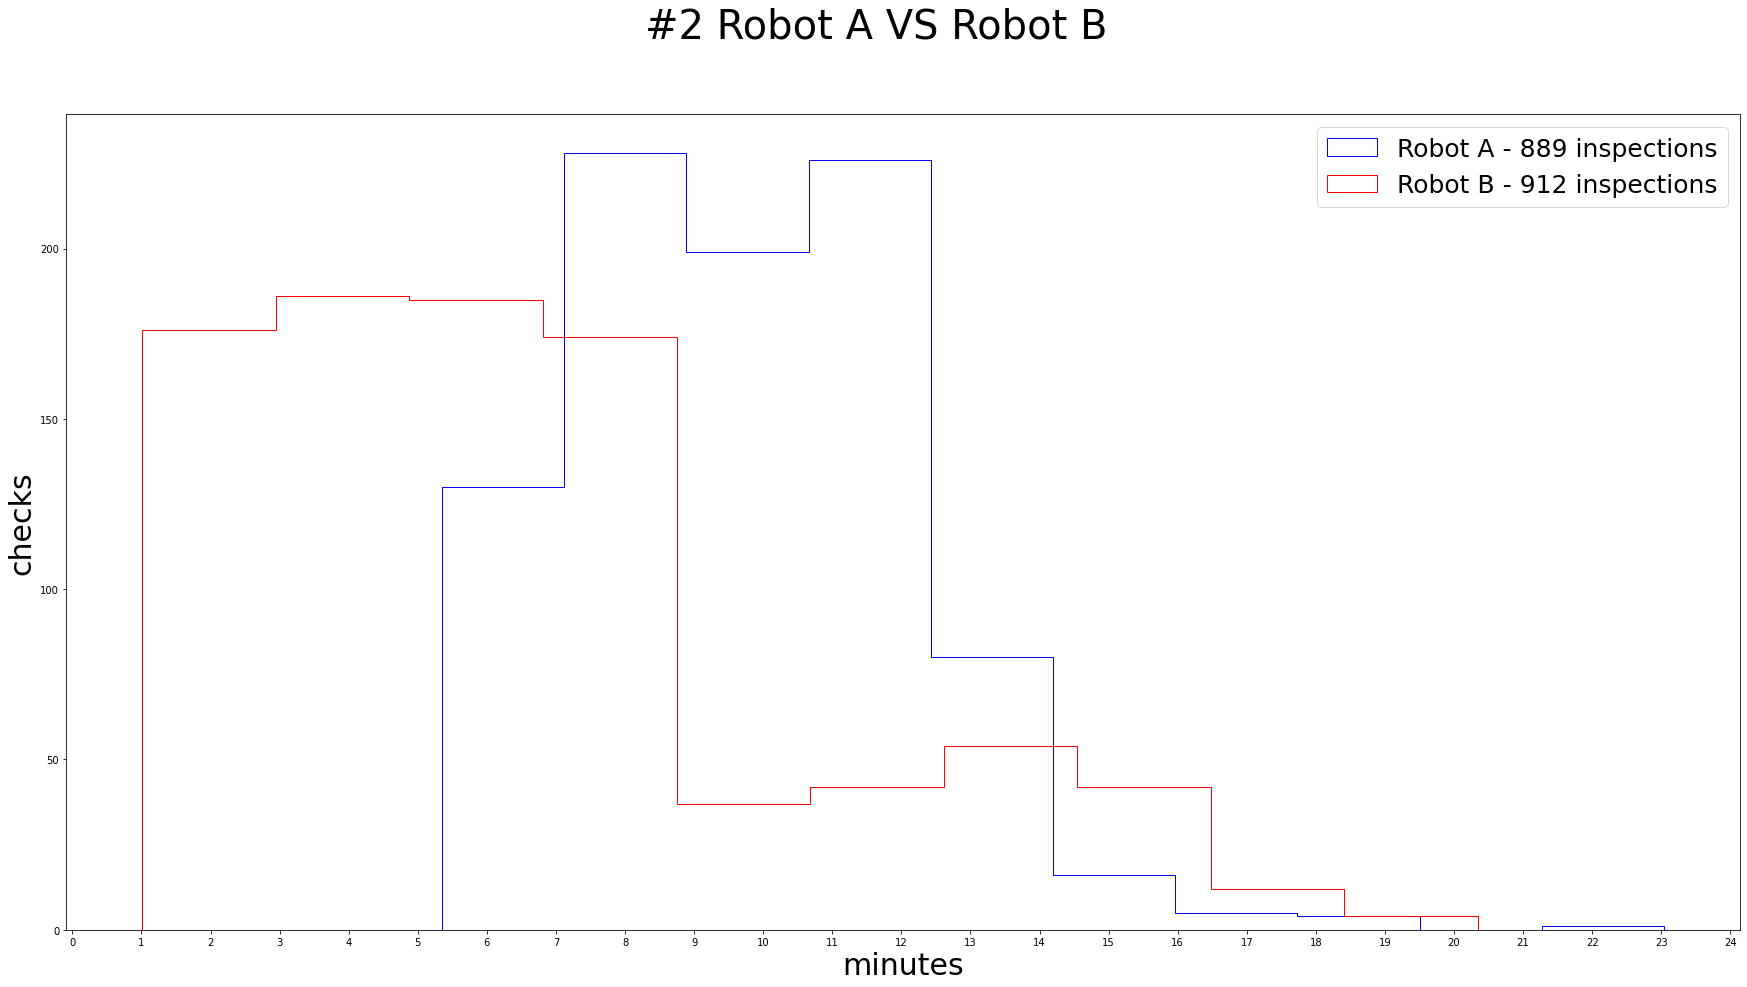

In [4]:
plt.figure(figsize=(30, 15))
plt.suptitle('#1 Robot A VS Robot B', fontsize=40)
plt.xticks(np.arange(0, 30, step=1))
plt.xlabel('minutes', fontsize=30)
plt.ylabel('checks', fontsize=30)

robot_a_inspections = len(robot_a)
robot_b_inspections = len(robot_b)

_ = plt.hist(robot_a, histtype='step', fill=False, color="blue", label="Robot A - " + str(robot_a_inspections) + " inspections", bins = 10)
_ = plt.hist(robot_b, histtype='step', fill=False, color="red", label="Robot B - " + str(robot_b_inspections) + " inspections", bins = 10)
_ = plt.legend(prop={'size': 25}) 



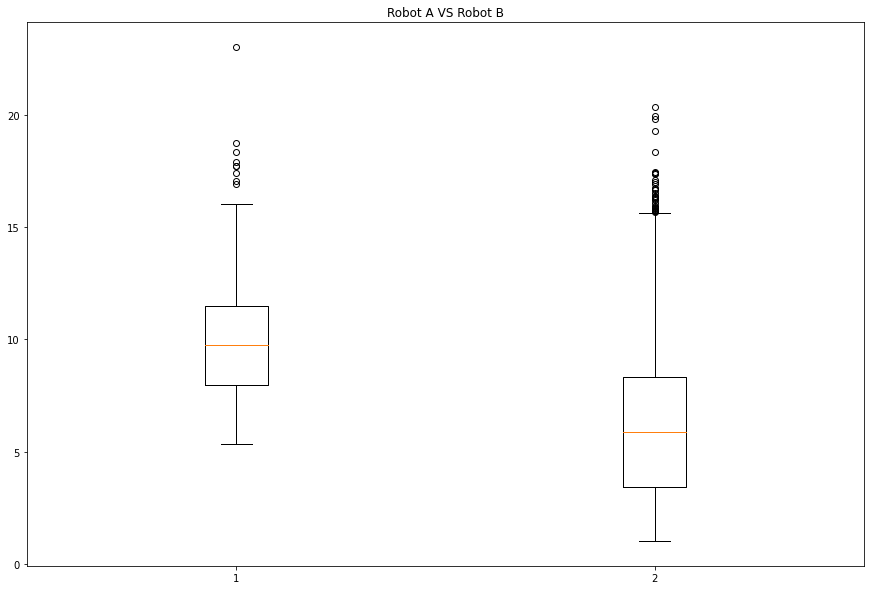

In [31]:
data = [robot_a["minutes"], robot_b["minutes"]]
fig1, ax1 = plt.subplots(1, figsize=(15, 10))
ax1.set_title('#1 Robot A VS Robot B')
_ = ax1.boxplot(data)

In [37]:
def is_defective() -> bool:
    if np.random.random()*100 < 20:
        return True
    else:
        return False

def inspection_cost(minutes: float, must_heat:bool = True) -> float:
    cost = 5
    heat_cost = 1000
    forge_cost = 10
    
    if must_heat:
        cost = cost + heat_cost
    
    cost = cost + forge_cost
    
    if is_defective():
        if minutes < 13:
            cost = cost + inspection_cost(minutes, False)
        else:
            cost = cost + inspection_cost(minutes, True)
    
    return cost

must_heat = True
robot_a_cost = 0
robot_b_cost = 0

print("#3 Comparación de costes trastos + inspección con Robores (individual y Montecarlo)\n")

# 1 execution
for minutes in robot_a["minutes"]:
    robot_a_cost = robot_a_cost + inspection_cost(minutes, must_heat)
    
for minutes in robot_b["minutes"]:
    robot_b_cost = robot_b_cost + inspection_cost(minutes, must_heat)

print("Coste medio Roboto A (1 ex)", f"{robot_a_cost/robot_a_inspections:,.2f}")
print("Coste medio Roboto B (1 ex)", f"{robot_b_cost/robot_b_inspections:,.2f}")

# n executions

robot_a_cost = 0
robot_b_cost = 0
total_ex = 1000

for ex in range(0, total_ex):
    for minutes in robot_a["minutes"]:
        robot_a_cost = robot_a_cost + inspection_cost(minutes, must_heat)

    for minutes in robot_b["minutes"]:
        robot_b_cost = robot_b_cost + inspection_cost(minutes, must_heat)

print("Coste medio Roboto A (Montecarlo)", f"{robot_a_cost/robot_a_inspections/total_ex:,.2f}")
print("Coste medio Roboto B (Montecarlo)", f"{robot_b_cost/robot_a_inspections/total_ex:,.2f}")

# human executions

human_cost = 0
total_ex = 10000

for ex in range(0, total_ex):
    human_minutes = np.random.randint(20,31)
    human_cost = human_cost + inspection_cost(human_minutes, must_heat)


print("Coste medio con humanos (Montecarlo)", f"{human_cost/total_ex:,.2f}")

#3 Comparación de costes trastos + inspección con Robores (individual y Montecarlo)

Coste medio Roboto A (1 ex) 1,033.42
Coste medio Roboto B (1 ex) 1,031.96
Coste medio Roboto A (Montecarlo) 1,028.94
Coste medio Roboto B (Montecarlo) 1,073.40
Coste medio con humanos (Montecarlo) 1,266.62


In [28]:
robot_a_q1 = round(np.percentile(robot_a, 25), 2)
robot_a_q2 = round(np.percentile(robot_a, 50), 2)
robot_a_q3 = round(np.percentile(robot_a, 75), 2)
robot_a_iqr = round(robot_a_q3 - robot_a_q1, 2)
robot_a_min = round(min(robot_a["minutes"]), 2)
robot_a_max = round(max(robot_a["minutes"]), 2)
robot_a_outlier_below = round(robot_a_q1 - (1.5 * robot_a_iqr), 2) 
robot_a_outlier_above = round(robot_a_q3 + (1.5 * robot_a_iqr), 2)

print("-- Robot A --")
print("min",robot_a_min)
print("max",robot_a_max)
print("q1 ",robot_a_q1)
print("q2 ",robot_a_q2)
print("q3 ",robot_a_q3)
print("iqr",robot_a_iqr)
print("inf", robot_a_outlier_below)
print("sup", robot_a_outlier_above)

robot_b_q1 = round(np.percentile(robot_b, 25), 2)
robot_b_q2 = round(np.percentile(robot_b, 50), 2)
robot_b_q3 = round(np.percentile(robot_b, 75), 2)
robot_b_iqr = round(robot_b_q3 - robot_b_q1, 2)
robot_b_min = round(min(robot_b["minutes"]), 2)
robot_b_max = round(max(robot_b["minutes"]), 2)
robot_b_outlier_below = round(robot_b_q1 - (1.5 * robot_b_iqr), 2)
robot_b_outlier_above = round(robot_b_q3 + (1.5 * robot_b_iqr), 2)

print("\n-- Robot B --")
print("min",robot_b_min)
print("max",robot_b_max)
print("q1 ",robot_b_q1)
print("q2 ",robot_b_q2)
print("q3 ",robot_b_q3)
print("iqr",robot_b_iqr)
print("inf", robot_b_outlier_below)
print("sup", robot_b_outlier_above)


-- Robot A --
min 5.35
max 23.04
q1  7.98
q2  9.77
q3  11.5
iqr 3.52
inf 2.7
sup 16.78

-- Robot B --
min 1.01
max 20.35
q1  3.41
q2  5.89
q3  8.31
iqr 4.9
inf -3.94
sup 15.66
